# Increasing Image Resolution with Autoencoders

### Context

**Image scaling autoencoder**

An autoencoder is a type of neural network used to learn a compact representation of a data set, such as images. In the case of using an autoencoder to increase the resolution of an image, an autoencoder architecture known as **image scaling** autoencoder can be used.

These models take a low-resolution image as input and learn to reconstruct a higher-resolution version of the same image. This is achieved using encoding and decoding layers in the neural network, where the encoding layer learns to represent the low resolution image compactly and the decoding layer learns to reconstruct the higher resolution image from this compact representation.

### Libreries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

### Dataloader

The dataset that has been chosen for the development of this practice is the MNIST, due to its simplicity as a first approximation.

In [2]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)

mnist_data_valid = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

data_loader_valid = torch.utils.data.DataLoader(dataset=mnist_data_valid,
                                          batch_size=64,
                                          shuffle=True)   

100%|██████████| 9912422/9912422 [00:00<00:00, 16243748.26it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 19191332.99it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 10161447.60it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Check which values the images fit between

To check that the data is in the expected range (normalized images) and that there are no outliers, the minimum and maximum value of the images are printed. The values must be between 0 and 1.

In [3]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


### Model

The auto-encoder neural network that will be used in practice is created and coded. This transforms 7 * 7 images into 28 * 28 images.

In [8]:
class Autoencoder_7(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, 5, stride=2, padding=3),
            nn.ReLU(),
            nn.Conv2d(8, 16, 5, stride=2, padding=3), 
            nn.ReLU(),
            nn.Conv2d(16, 32, 2),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, 4, stride=2, padding=3, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 1, 5, stride=2, padding=3, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### Model hiper-parameters

In [9]:
model = Autoencoder_7()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             weight_decay=1e-5)

### Model training

In [ ]:
num_epochs = 7
outputs = []

In [10]:
for epoch in range(num_epochs):
    for (img, tag) in data_loader:
        transform = transforms.Resize(size = (7,7))
        img_reshape = transform(img)
        recon = model(img_reshape)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0512
Epoch:2, Loss:0.0286
Epoch:3, Loss:0.0255
Epoch:4, Loss:0.0231
Epoch:5, Loss:0.0219
Epoch:6, Loss:0.0221
Epoch:7, Loss:0.0214


### Showing the results

To check if the network has managed to learn the relevant patterns from the images, they will be displayed and a comparison will be made between the results and the real data.

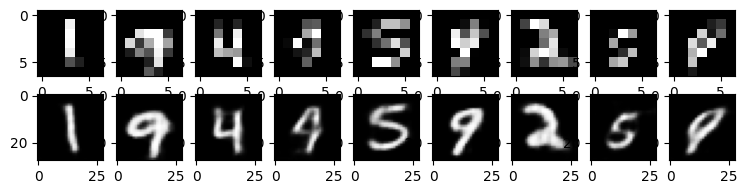

In [11]:
plt.figure(figsize=(9, 2))
plt.gray()
img_reshape = transform(outputs[num_epochs-1][1])
imgs = img_reshape.detach().numpy()
recon = outputs[num_epochs-1][2].detach().numpy()
    
for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2, 9, i+1)
    plt.imshow(item[0])
            
for i, item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1) 
    plt.imshow(item[0])

### Advantages

1. It allows obtaining higher resolution images from low resolution images without having to resort to pixel interpolation techniques, which can improve the quality of the final image.
2. By using an autoencoder to learn a compact representation of the image, better quality results can be obtained than with other image scaling methods.